### **Pandas**
- 구조화된 데이터의 처리를 지원하는 Python 라이브러리 - Python 버전의 엑셀같은느낌
- numpy와 시너지를 발휘하여 강력한 "스프레드시트"처리 기능을 제공

- 판다스의 구조<br>
![img](https://ifh.cc/g/CMHKnj.jpg)

**[ Series ]**
- column vector를 표현하는 object
- 일반 list와 달리 인덱싱을 0부터의 숫자뿐만 아니라 문자로도 할 수있음

In [10]:
from IPython.display import Image
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

list_data = [1,2,3,4,5]
list_name = ["a","b","c","d","e"]
example_obj = pd.Series(data = list_data, index = list_name) # index 이름을 지정
# 만약 values보다 index들을 더 많이 지정해줬다면 그 빈공간만큼 values자리에 NaN으로 표기
example_obj

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [11]:
# dict 타입으로도 인덱스 지정해줄수 있음
dict_data = {"a":1, "b":2, "c":3, "d":4, "e":5}
example_obj = pd.Series(dict_data, dtype=np.float32, name="example_data") # name은 series의 이름
example_obj

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
Name: example_data, dtype: float32

In [12]:
# 값 리스트만 출력
example_obj.values

array([1., 2., 3., 4., 5.], dtype=float32)

In [13]:
# index 리스트만 출력
example_obj.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

**[ datafarame ]**
- Data Table 전체를 포함하는 Object, Series를 모아서 만든 Data Table = 기본 2차원

In [14]:
# data from:
ipl_data = {
    "Team" : [
        "Riders",
        "Riders",
        "Devils",
        "Devils",
        "Kings",
        "Kings",
        "Kings",
        "Kings",
        "Riders",
        "Royals",
        "Royals",
        "Riders",
    ],
    "Rank" : [1,2,2,3,3,4,1,1,2,4,1,2],
    "Year" : [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
    "Points" : [876,789,863,673,741,812,756,788,694,701,804,690],
}
df = pd.DataFrame(ipl_data)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [15]:
# 특정 column 선택하여 출력
df = pd.DataFrame(ipl_data, columns=["Team", "Rank"])
# 이렇게 Series를 하나씩 불러올수 있음
df.Team
df

,Team,Rank
0,Riders,1
1,Riders,2
2,Devils,2
3,Devils,3
4,Kings,3
5,Kings,4
6,Kings,1
7,Kings,1
8,Riders,2
9,Royals,4


**[ dataframe indexing ]**
- loc[ ] : location, [ ]안의 구간에 있는 obs들의 특성을 출력, index의 이름을 인식해 출력
- iloc[ ] : loc과 같지만 이건 index number를 인식해 출력해줌

In [16]:
df = pd.DataFrame(ipl_data)
df.loc[:,"Points"]

0     876
1     789
2     863
3     673
4     741
5     812
6     756
7     788
8     694
9     701
10    804
11    690
Name: Points, dtype: int64

In [17]:
df.iloc[:3]

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863


**[ dataframe handling ]**
- .T : transpose, 전치행렬
- .values : 값 출력
- .to_csv() : csv전환
- del df[] : column 삭제
- .drop(원하는 인덱스) : 실제로 지워지는건 아님, 실제로 지우려면 inplac=True도 해줘야됨

In [18]:
# Tip : .T하면 transepose되니까 적은 데이터 보기엔 더 편함
df.head(2).T

,0,1
Team,Riders,Riders
Rank,1,2
Year,2014,2015
Points,876,789


#### **Dataframe Operations**
**[ series operation ]**
- index 기준으로 연산수행
- 겹치는 index가 없을 경우 NaN값으로 반환

In [19]:
s1 = pd.Series(
     range(1,6), index = list('abced'))
s1

a    1
b    2
c    3
e    4
d    5
dtype: int64

In [20]:
s2 = pd.Series(
    range(5,11), index = list('bcedef'))
s2

b     5
c     6
e     7
d     8
e     9
f    10
dtype: int64

In [21]:
s1.add(s2)

a     NaN
b     7.0
c     9.0
d    13.0
e    11.0
e    13.0
f     NaN
dtype: float64

In [22]:
s1 + s2
# series에서 index는 중복을 허용함

a     NaN
b     7.0
c     9.0
d    13.0
e    11.0
e    13.0
f     NaN
dtype: float64

**[ dataframe operation ]**

In [23]:
df1 = pd.DataFrame(np.arange(9).reshape(3,3), columns=list('abc'))
df1

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [24]:
df2 = pd.DataFrame(np.arange(16).reshape(4,4), columns=list('abcd'))
df2

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [25]:
#둘의 shape이 다르니까 NaN값 발생
df1 + df2

,a,b,c,d
0,0.0,2.0,4.0,NaN
1,7.0,9.0,11.0,NaN
2,14.0,16.0,18.0,NaN
3,NaN,NaN,NaN,NaN


In [26]:
# NaN값을 0으로 채워줌
df1.add(df2, fill_value=0)

,a,b,c,d
0,0.0,2.0,4.0,3.0
1,7.0,9.0,11.0,7.0
2,14.0,16.0,18.0,11.0
3,12.0,13.0,14.0,15.0


**[ series + dataframe ]**
- 연산이 가능한 형태라도 꼭 axis 정해주고 row broadcasting 실행해야됨

- **axis 개념**<br>
![img](https://ifh.cc/g/0AHS5M.jpg)

In [30]:
s3 = pd.Series(np.arange(10,14))
df2 +s3

,a,b,c,d,0,1,2,3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df2.add(s3, axis=0)

,a,b,c,d
0,10,11,12,13
1,15,16,17,18
2,20,21,22,23
3,25,26,27,28


#### **Map for Series**
- pandas의 series type의 데이터에도 map함수 사용가능
- function 대신 dict, sequence형 자료등으로 대체 가능
<br><br>
- map for series 예시<br>
![img](https://ifh.cc/g/mkaVrG.jpg)

In [33]:
s1 = pd.Series(np.arange(10))
# 원소들을 본인의 제곱을해서 반환하도록
s1.map(lambda x: x**2).head(5)

0     0
1     1
2     4
3     9
4    16
dtype: int64

**[ replace ]**
- map함수의 기능 중 데이터 변환 기능만 담당
- 데이터 변환시 많이 사용하는 함수

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/rstudio/Intro/master/data/wages.csv")
df.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


In [35]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [36]:
def change_sex(x):
    return 0 if x == 'male' else 1

df.sex.map(change_sex)
#하지만 아직 할당하지 않았으니 실제 데이터는 바뀌지 않았음

0       0
1       1
2       1
3       1
4       1
       ..
1374    0
1375    1
1376    1
1377    0
1378    0
Name: sex, Length: 1379, dtype: int64

In [37]:
# 이제 할당
df["sex_code"] = df.sex.map({"male" : 0, "female" : 1})
df.head(5)

,earn,height,sex,race,ed,age,sex_code
0,79571.299011,73.89,male,white,16,49,0
1,96396.988643,66.23,female,white,16,62,1
2,48710.666947,63.77,female,white,16,33,1
3,80478.096153,63.22,female,other,16,95,1
4,82089.345498,63.08,female,white,17,43,1


In [38]:
# 이건 할당 안된거. 할당 하려면, 뒤쪽에 inplace = True 해줘야함,
# 그래야 이후 작업에서도 따로 저장할 필요없음
df.sex.replace({"male" : 0, "female" : 1})

0       0
1       1
2       1
3       1
4       1
       ..
1374    0
1375    1
1376    1
1377    0
1378    0
Name: sex, Length: 1379, dtype: int64

In [39]:
df.drop("sex_code", axis=1, inplace=True)
df

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43
...,...,...,...,...,...,...
1374,30173.380363,71.68,male,white,12,33
1375,24853.519514,61.31,female,white,18,86
1376,13710.671312,63.64,female,white,12,37
1377,95426.014410,71.65,male,white,12,54


#### **Apply for Dataframe**
- map과 달리, series 전체(column)에 해당 함수를 적용
- 입력 값을 series 데이터로 입력 받아 handling 가능
- 내장 연산 함수를 사용할 때도 똑같은 효과(mean, std 등)
- 통계치 같은거 나타낼때 많이 쓰임

In [40]:
df_info = df[["earn", "height", "age"]]
df_info.head()

,earn,height,age
0,79571.299011,73.89,49
1,96396.988643,66.23,62
2,48710.666947,63.77,33
3,80478.096153,63.22,95
4,82089.345498,63.08,43


In [41]:
f =lambda x: np.mean(x)
df_info.apply(f)
# 바로 df_info_mean() 해줘도됨

earn      32446.292622
height       66.592640
age          45.328499
dtype: float64

**[ pandas bult-in functions ]**
- **.describe()** : Numeric type 데이터의 요약 정보를 보여줌
- **.unique()** : series data에서의 유일한 값을 list를 반환함
- **.sum()** : sub, mean, min, max, count, median, mad, var 등등
- **.isnull()** : column 또는 row 값의 NaN(null) 값의 index를 반환
- **.sort_values()** : column 값을 기준으로 데이터를 sorting
- **Correlation & Covariance** : corr, cov, corrwith, 상관계수, 공분산

In [42]:
# axis=0 : column별로
df.sum(axis = 0)

earn                                          44743437.5254
height                                             91831.25
sex       malefemalefemalefemalefemalefemalefemalemalema...
race      whitewhitewhiteotherwhitewhitewhitewhitehispan...
ed                                                    18416
age                                                   62508
dtype: object

In [43]:
# axis=1 : row별로
df.sum(axis = 1)

0       79710.189011
1       96541.218643
2       48823.436947
3       80652.316153
4       82212.425498
            ...     
1374    30290.060363
1375    25018.829514
1376    13823.311312
1377    95563.664410
1378     9686.681857
Length: 1379, dtype: float64

In [44]:
# 보통 뒤의 function들이랑 함께 씀
df.isnull().sum()

earn      0
height    0
sex       0
race      0
ed        0
age       0
dtype: int64

In [45]:
# age와 earn을 오름차순으로 정렬
df.sort_values(["age","earn"], ascending=True).head(10)

,earn,height,sex,race,ed,age
1038,-56.321979,67.81,male,hispanic,10,22
800,-27.876819,72.29,male,white,12,22
963,-25.655260,68.90,male,white,12,22
1105,988.565070,64.71,female,white,12,22
801,1000.221504,64.09,female,white,12,22
862,1002.023843,66.59,female,white,12,22
933,1007.994941,68.26,female,white,12,22
988,1578.542814,64.53,male,white,12,22
522,1955.168187,69.87,female,black,12,22
765,2581.870402,64.79,female,white,12,22


In [46]:
# 나이와 소득간의 상관관계
df.age.corr(df.earn)

0.07400349177836055

In [47]:
# 상관관계를 분석할 때도 무턱대고 하지말고 나름의 selection을 해서 더 정확한 분석을 하자
df.age[(df.age < 60) & (df.age > 20)].corr(df.earn)


0.2670767289202016

<span style='background-color:#fff5b1'>[ Groupby ]</span>
- df.groupby(["기준데이터1","기준데이터2"...])["보고싶은데이터"]
- 특정 칼럼을 기준으로 데이터를 다른형태로 묶어냄 (결과물도 dataframe이긴 함)
- split -> apply -> combine 과정을 거쳐 연산
<br><br>

**[ Hierarchical index ]**
- type : series
- 두 개의 column으로 groupby하면, index가 두개 생성됨<br><br>

![img](https://ifh.cc/g/m4VbNc.jpg)

In [48]:
df

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43
...,...,...,...,...,...,...
1374,30173.380363,71.68,male,white,12,33
1375,24853.519514,61.31,female,white,18,86
1376,13710.671312,63.64,female,white,12,37
1377,95426.014410,71.65,male,white,12,54


In [49]:
df = pd.DataFrame(ipl_data)
df.groupby("Team")["Points"].sum()
#    () : 묶음의 기준이되는 컬럼   .sum() : 적용받는연산
#              [] : 적용받는 컬럼
#즉, Team이라는 컬럼을 기준으로 Points를 sum한다.

Team
Devils    1536
Kings     3097
Riders    3049
Royals    1505
Name: Points, dtype: int64

In [50]:
# 각 팀이 연도별로 얼마를 받았는가
h_index = df.groupby(["Team","Year"])["Points"].sum()
# Hierarchical index : 두 개의 column으로 groupby할 경우, index가 두개 생성
h_index

Team    Year
Devils  2014    863
        2015    673
Kings   2014    741
        2015    812
        2016    756
        2017    788
Riders  2014    876
        2015    789
        2016    694
        2017    690
Royals  2014    701
        2015    804
Name: Points, dtype: int64

In [51]:
# 인덱스 두개인거 확인
h_index.index

MultiIndex([('Devils', 2014),
            ('Devils', 2015),
            ( 'Kings', 2014),
            ( 'Kings', 2015),
            ( 'Kings', 2016),
            ( 'Kings', 2017),
            ('Riders', 2014),
            ('Riders', 2015),
            ('Riders', 2016),
            ('Riders', 2017),
            ('Royals', 2014),
            ('Royals', 2015)],
           names=['Team', 'Year'])

In [52]:
# unstack : data를 matrix형태로 풀어주기
h_index.unstack()

Year,2014,2015,2016,2017
Team,,,,
Devils,863.0,673.0,NaN,NaN
Kings,741.0,812.0,756.0,788.0
Riders,876.0,789.0,694.0,690.0
Royals,701.0,804.0,NaN,NaN


In [53]:
# set_index : dataframe 내의 열을 이용한 인덱스 설정
# rest_index : 인덱스를 초기화할수도있음
h_index.reset_index()

,Team,Year,Points
0,Devils,2014,863
1,Devils,2015,673
2,Kings,2014,741
3,Kings,2015,812
4,Kings,2016,756
5,Kings,2017,788
6,Riders,2014,876
7,Riders,2015,789
8,Riders,2016,694
9,Riders,2017,690


**[ Hierarhical index - swaplevel ]**
- index level을 변경할 수 있음
- .sort_index(level=~~) : 지정하는 level로 재정렬 할수있음

In [54]:
# level을 서로 바꿔줄수도 있음( level : index같은 느낌)
h_index.swaplevel()

Year  Team  
2014  Devils    863
2015  Devils    673
2014  Kings     741
2015  Kings     812
2016  Kings     756
2017  Kings     788
2014  Riders    876
2015  Riders    789
2016  Riders    694
2017  Riders    690
2014  Royals    701
2015  Royals    804
Name: Points, dtype: int64

In [55]:
# .sort_index(level=~~) : 지정하는 level로 재정렬 할수있음
h_index.swaplevel().sort_index(level=1)

Year  Team  
2014  Devils    863
2015  Devils    673
2014  Kings     741
2015  Kings     812
2016  Kings     756
2017  Kings     788
2014  Riders    876
2015  Riders    789
2016  Riders    694
2017  Riders    690
2014  Royals    701
2015  Royals    804
Name: Points, dtype: int64

In [56]:
# series type의 data이기 때문에 level 지정하면서 데이터 만질수 있음
h_index.std(level=1)

Year
2014    87.439026
2015    65.035888
2016    43.840620
2017    69.296465
Name: Points, dtype: float64

#### **[ grouped ]**
- Groupby에 의해 split된 상태를 추출 가능
- 추출된 group 정보에는 세가지 유형의 apply 가능
- **Aggregation** : 요약된 통계정보를 추출해줌 (sum, mean, std 등)
- **Transformation** : 해당 정보를 변환(lamda 등을 이용)
- **Filtration** : 특정 정보를 제거하여 보여주는 필터링 기술

In [57]:
grouped = df.groupby("Team")

#   key, value 형태로 출력
for name,group in grouped:
    print(name)
    print(group)

Devils
     Team  Rank  Year  Points
2  Devils     2  2014     863
3  Devils     3  2015     673
Kings
    Team  Rank  Year  Points
4  Kings     3  2014     741
5  Kings     4  2015     812
6  Kings     1  2016     756
7  Kings     1  2017     788
Riders
      Team  Rank  Year  Points
0   Riders     1  2014     876
1   Riders     2  2015     789
8   Riders     2  2016     694
11  Riders     2  2017     690
Royals
      Team  Rank  Year  Points
9   Royals     4  2014     701
10  Royals     1  2015     804


**[ groupby - Aggregation ]**
- 요약된 통계정보를 추출해줌 (sum, mean, std 등)

In [58]:
grouped.get_group("Devils")

,Team,Rank,Year,Points
2,Devils,2,2014,863
3,Devils,3,2015,673


In [59]:
grouped.agg(sum)

,Rank,Year,Points
Team,,,
Devils,5,4029,1536
Kings,9,8062,3097
Riders,7,8062,3049
Royals,5,4029,1505


In [60]:
import numpy as np
# 여러개의 function을 apply할 수 있음
grouped.agg([np.sum, np.mean, np.std])

Rank                  Year                   Points                    
        sum  mean       std   sum    mean       std    sum    mean         std
Team                                                                          
Devils    5  2.50  0.707107  4029  2014.5  0.707107   1536  768.00  134.350288
Kings     9  2.25  1.500000  8062  2015.5  1.290994   3097  774.25   31.899582
Riders    7  1.75  0.500000  8062  2015.5  1.290994   3049  762.25   88.567771
Royals    5  2.50  2.121320  4029  2014.5  0.707107   1505  752.50   72.831998

In [61]:
# describe() : 특징들 다 출력
grouped.describe().T

Team               Devils        Kings       Riders       Royals
Rank   count     2.000000     4.000000     4.000000     2.000000
       mean      2.500000     2.250000     1.750000     2.500000
       std       0.707107     1.500000     0.500000     2.121320
       min       2.000000     1.000000     1.000000     1.000000
       25%       2.250000     1.000000     1.750000     1.750000
       50%       2.500000     2.000000     2.000000     2.500000
       75%       2.750000     3.250000     2.000000     3.250000
       max       3.000000     4.000000     2.000000     4.000000
Year   count     2.000000     4.000000     4.000000     2.000000
       mean   2014.500000  2015.500000  2015.500000  2014.500000
       std       0.707107     1.290994     1.290994     0.707107
       min    2014.000000  2014.000000  2014.000000  2014.000000
       25%    2014.250000  2014.750000  2014.750000  2014.250000
       50%    2014.500000  2015.500000  2015.500000  2014.500000
       75%    2014.750000  2016.250000  2016.250000  2014.750000
       max    2015.000000  2017.000000  2017.000000  2015.000000
Points count     2.000000     4.000000     4.000000     2.000000
       mean    768.000000   774.250000   762.250000   752.500000
       std     134.350288    31.899582    88.567771    72.831998
       min     673.000000   741.000000   690.000000   701.000000
       25%     720.500000   752.250000   693.000000   726.750000
       50%     768.000000   772.000000   741.500000   752.500000
       75%     815.500000   794.000000   810.750000   778.250000
       max     863.000000   812.000000   876.000000   804.000000

**[ Groupby - transformation ]**
- Aggregation과 달리 key값 별로 요약된 정보가 아님
- 개별 데이터의 변환을 지원함

In [62]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [63]:
score = lambda x: (x.max())
grouped.transform(score)
# Team으로 grouped 됐으니까 그 column은 사라지고 그 이후에
# column별로 돌면서 같이 grouped된 애들 중에서 max로 다 대체함

,Rank,Year,Points
0,2,2017,876
1,2,2017,876
2,3,2015,863
3,3,2015,863
4,4,2017,812
5,4,2017,812
6,4,2017,812
7,4,2017,812
8,2,2017,876
9,4,2015,804


In [64]:
score = lambda x: (x-x.mean())/x.std() # 정규화 작업
grouped.transform(score)

,Rank,Year,Points
0,-1.500000,-1.161895,1.284327
1,0.500000,-0.387298,0.302029
2,-0.707107,-0.707107,0.707107
3,0.707107,0.707107,-0.707107
4,0.500000,-1.161895,-1.042333
5,1.166667,-0.387298,1.183401
6,-0.833333,0.387298,-0.572108
7,-0.833333,1.161895,0.431040
8,0.500000,0.387298,-0.770596
9,0.707107,-0.707107,-0.707107


**[ groupby - filter ]**
- 특정 조건으로 데이터를 검색할 때 사용

In [65]:
df["Team"].value_counts()

Riders    4
Kings     4
Devils    2
Royals    2
Name: Team, dtype: int64

In [66]:
df.groupby("Team").filter(lambda x: len(x) >= 3)
# 팀별로 데이터가 3개 이상인 것만 출력

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [67]:
df.groupby("Team").filter(lambda x: x["Points"].mean() > 700)
# 팀별로 평균 점수가 700점 이상인 팀들만 추출

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


#### **Case sutdy**
**Data**
- 시간과 데이터 종류가 정리된 통화량 데이터
- !wget ~~링크 : 링크에 있는 파일 다운로드함<br>

**[ .unstack() ]**
- groupby해놓은 애를 매트릭스 형태로
- 데이터들을 테이블 형식으로 보고싶을때
- 인자로 level= ~~ 줄수도 있음, level은 mulit index의 몇번째 index를 칼럼방향으로 stacking할 것인가를 의미


In [69]:
# 파일 불러오기
df_phone = pd.read_csv("C:/Users/hyun/workspace/TIL/MachineLearning/0_references/data/phone_data.csv")
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [70]:
# dtype확인 
df_phone.dtypes

index             int64
date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [71]:
import dateutil

df_phone["date"] = df_phone["date"].apply(dateutil.parser.parse, dayfirst=True)
df_phone.dtypes
# 원래 date의 type은 object였는데 datetime64(날짜형식)으로 바꿈


index                    int64
date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [72]:
df_phone

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world


In [73]:
df_phone.groupby("month")["duration"].mean()
# 각 month마다 duration의 평균

month
2014-11    115.823657
2014-12     93.260318
2015-01     88.894141
2015-02    113.301453
2015-03    225.251891
Name: duration, dtype: float64

<AxesSubplot:xlabel='month'>

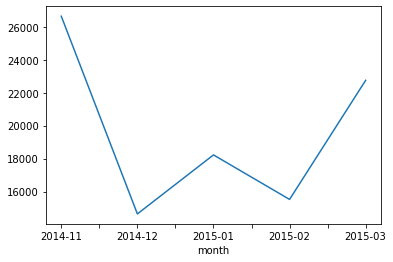

In [74]:
import matplotlib
df_phone.groupby("month")["duration"].sum().plot()
# 시각화 까지, 월별 통화량의 변화

<AxesSubplot:xlabel='month'>

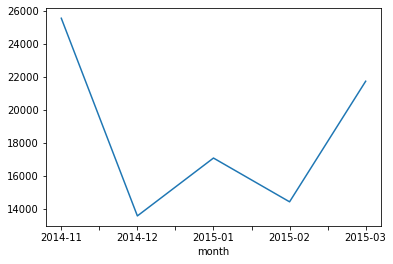

In [75]:
df_phone[df_phone["item"] == "call"].groupby("month")["duration"].sum().plot()
# df중 call만 뽑아서 월별로 통화량의 변화

<AxesSubplot:xlabel='month'>

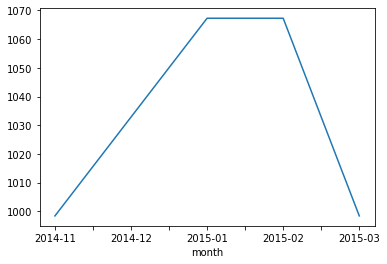

In [76]:
df_phone[df_phone["item"] == "data"].groupby("month")["duration"].sum().plot()
# 이건 data만 뽑아서

<AxesSubplot:xlabel='month'>

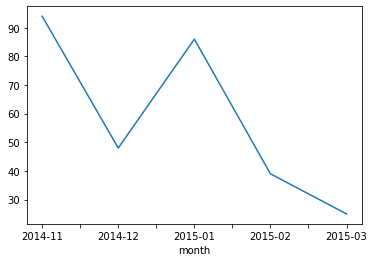

In [77]:
df_phone[df_phone["item"] == "sms"].groupby("month")["duration"].sum().plot()

In [78]:
df_phone.groupby(["month","item"])["duration"].count()
# month와 item별로 뽑을수도 있음

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: duration, dtype: int64

<AxesSubplot:xlabel='month'>

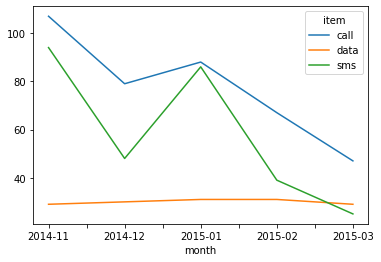

In [79]:
df_phone.groupby(["month","item"])["duration"].count().unstack().plot()
# unstack하여 데이터를 분리한 뒤 다시 시각화 할수도 있음

In [80]:
df_phone.groupby("month", as_index=False).agg({"duration" : "sum"})
# as_index=False : 원래 month가 index역할인데 그걸 안시킴
# agg.~~ : duration에게는 sum을 적용해라

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [81]:
df_phone.groupby(["month", "item"]).agg(
    {
        "duration" : [min],            # duration에는 min 적용
        "network_type" : "count",    # network에는 count 적용
        "date" : [min, "first", "nunique"],   # first : 제일 먼저 나오는 값
    }
)

duration network_type                date                      \
                  min        count                 min               first   
month   item                                                                 
2014-11 call    1.000          107 2014-10-15 06:58:00 2014-10-15 06:58:00   
        data   34.429           29 2014-10-15 06:58:00 2014-10-15 06:58:00   
        sms     1.000           94 2014-10-16 22:18:00 2014-10-16 22:18:00   
2014-12 call    2.000           79 2014-11-14 17:24:00 2014-11-14 17:24:00   
        data   34.429           30 2014-11-13 06:58:00 2014-11-13 06:58:00   
        sms     1.000           48 2014-11-14 17:28:00 2014-11-14 17:28:00   
2015-01 call    2.000           88 2014-12-15 20:03:00 2014-12-15 20:03:00   
        data   34.429           31 2014-12-13 06:58:00 2014-12-13 06:58:00   
        sms     1.000           86 2014-12-15 19:56:00 2014-12-15 19:56:00   
2015-02 call    1.000           67 2015-01-15 10:36:00 2015-01-15 10:36:00   
        data   34.429           31 2015-01-13 06:58:00 2015-01-13 06:58:00   
        sms     1.000           39 2015-01-15 12:23:00 2015-01-15 12:23:00   
2015-03 call    2.000           47 2015-02-12 20:15:00 2015-02-12 20:15:00   
        data   34.429           29 2015-02-13 06:58:00 2015-02-13 06:58:00   
        sms     1.000           25 2015-02-19 18:46:00 2015-02-19 18:46:00   

                      
             nunique  
month   item          
2014-11 call     104  
        data      29  
        sms       79  
2014-12 call      76  
        data      30  
        sms       41  
2015-01 call      84  
        data      31  
        sms       58  
2015-02 call      67  
        data      31  
        sms       27  
2015-03 call      47  
        data      29  
        sms       17

In [82]:
grouped = df_phone.groupby("month").agg({"duration" : [min, max, np.mean]})
grouped
# agg 활용

duration                     
             min      max        mean
month                                
2014-11      1.0   1940.0  115.823657
2014-12      1.0   2120.0   93.260318
2015-01      1.0   1859.0   88.894141
2015-02      1.0   1863.0  113.301453
2015-03      1.0  10528.0  225.251891

In [83]:
# droplevel() : 인자로 level= 줘서 특정 level을 떨어뜨림, 위 셀과 차이 비교
grouped.columns = grouped.columns.droplevel(level=0)
grouped

,min,max,mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [84]:
# add_prefix : 특성명에 지정 내용 추가함
grouped.add_prefix("duration_")

,duration_min,duration_max,duration_mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


**[ Pivot Table ]**
- index축은 groupby와 동일함
- Column에 추가로 labeling값을 추가하여 Value에 numeric type값을 aggregation하는 형태

In [86]:
df_phone = pd.read_csv("C:/Users/hyun/workspace/TIL/MachineLearning/0_references/data/phone_data.csv")
df_phone["date"] = df_phone["date"].apply(dateutil.parser.parse, dayfirst=True)

#head() : 첫 5개 데이터 출력
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [87]:
df_phone.pivot_table(
    values = ["duration"], # 테이블 안에 나타낼 값들
    index = [df_phone.month, df_phone.item],
    columns = df_phone.network,
    aggfunc = "sum",
    fill_value = 0, # NaN값들 채워주는 역할
)

duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

**[ Crosstab ]**
- Pivot table의 특수 형태
- 특히 두 칼럼의 교차 빈도, 비율, 덧셈 들을 구할 때 이용


In [88]:
df_phone.pivot_table(
    values = ["duration"],
    columns = df_phone.network,
    aggfunc = "sum",
    fill_value = 0, 
)

network,Meteor,Tesco,Three,Vodafone,data,landline,special,voicemail,world
duration,7233.0,13841.0,36551.0,14770.0,5164.35,18433.0,3.0,1775.0,7.0


In [89]:
# 위에랑 같은 내용인데 crosstab 이용
pd.crosstab(
    index = df_phone.network,
    columns = df_phone.month,
    values = df_phone.duration,
    aggfunc = "sum",
).fillna(0)

month,2014-11,2014-12,2015-01,2015-02,2015-03
network,,,,,
Meteor,1531.000,2022.00,2217.000,1189.000,274.000
Tesco,4048.000,1820.00,2907.000,4089.000,977.000
Three,12483.000,6329.00,6478.000,6290.000,4971.000
Vodafone,4371.000,1320.00,3666.000,1887.000,3526.000
data,998.441,1032.87,1067.299,1067.299,998.441
landline,2906.000,1424.00,1603.000,730.000,11770.000
special,1.000,0.00,0.000,2.000,0.000
voicemail,301.000,690.00,285.000,268.000,231.000
world,0.000,4.00,0.000,0.000,3.000


**[ Merge ]**
- 두 개의 데이터를 특정 칼럼을 기준으로 하나로 합침
- SQL에서의 Merge와 같은 기능
- 잘못하면 중복되는 데이터가 늘어날 수 있으니 주의

In [90]:
raw_data = {
    "subject_id" : ["1", "2", "3","4", "5", "7", "8", "9", "10", "11"],
    "test_score" : [51, 15, 15, 61, 16, 14, 15, 1, 61, 16],
}
df_a = pd.DataFrame(raw_data, columns=["subject_id", "test_score"])
df_a

,subject_id,test_score
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [91]:
raw_data = {
    "subject_id" : ["4", "5", "6", "7", "8"],
    "first_name" : ["Billy", "Brian", "Bran", "Bryce", "Betty"],
    "last_name" : ["Bonder", "Black", "Balwner", "Brice", "Btisan"],
}
df_b = pd.DataFrame(raw_data, columns=["subject_id", "first_name", "last_name"])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [92]:
# merge : df_a와 df_b를 합칠떄, on 내용을 기준으로 겹치는 것만 합침
pd.merge(df_a,df_b,on="subject_id")

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


In [93]:
# 만약 합칠 두 데이터의 이름이 다르다면 left_on,right_on으로 이름 지정해줌
pd.merge(df_a, df_b, left_on="subject_id", right_on="subject_id")

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


**[ Merge - join ]**
- inner join : 양쪽에 같은 데이터가 있을 때
- left join
- right join
- outer join
<br><br>
![img](https://ifh.cc/g/30fwPG.jpg)

In [94]:
# how : 합치는 기준, 아래같은 경우는 왼쪽꺼에다 오른쪽 거를 합침
# 겹쳐지는 내용은 아래처럼 같이 나옴, 안겹치면 NaN으로 표시
pd.merge(df_a, df_b, on='subject_id', how='left')

,subject_id,test_score,first_name,last_name
0,1,51,NaN,NaN
1,2,15,NaN,NaN
2,3,15,NaN,NaN
3,4,61,Billy,Bonder
4,5,16,Brian,Black
5,7,14,Bryce,Brice
6,8,15,Betty,Btisan
7,9,1,NaN,NaN
8,10,61,NaN,NaN
9,11,16,NaN,NaN


In [95]:
pd.merge(df_a, df_b, on='subject_id', how='right')

,subject_id,test_score,first_name,last_name
0,4,61.0,Billy,Bonder
1,5,16.0,Brian,Black
2,6,NaN,Bran,Balwner
3,7,14.0,Bryce,Brice
4,8,15.0,Betty,Btisan


In [96]:
# how의 기본값이 inner이긴 함
pd.merge(df_a, df_b, on='subject_id', how='inner')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


In [97]:
# outer join
pd.merge(df_a, df_b, on='subject_id', how='outer')

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,Billy,Bonder
4,5,16.0,Brian,Black
5,7,14.0,Bryce,Brice
6,8,15.0,Betty,Btisan
7,9,1.0,NaN,NaN
8,10,61.0,NaN,NaN
9,11,16.0,NaN,NaN


**[ index based join ]**
- 붙이긴 붙이는데 index값을 기준으로 붙임

In [98]:
# subject_id 같은 경우는 겹치니까 x,y로 나눠짐
pd.merge(df_a, df_b, right_index = True, left_index = True)

,subject_id_x,test_score,subject_id_y,first_name,last_name
0,1,51,4,Billy,Bonder
1,2,15,5,Brian,Black
2,3,15,6,Bran,Balwner
3,4,61,7,Bryce,Brice
4,5,16,8,Betty,Btisan


#### <span style='background-color:#fff5b1'>**concat**</span>
- 같은 형태의 데이터를 붙이는 연산작업(밑으로 붙이거나, 옆으로 붙이거나 ..)
<br><br>

**[ reset.index() ]**
- reset.index할 때 (drop=True) 꼭 해주자
- 인자로 inplace=True하면 dataframe 자기자신이 변함


In [99]:
df_new = pd.concat([df_a,df_b])
df_new.reset_index(drop=True)

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,NaN,NaN
4,5,16.0,NaN,NaN
5,7,14.0,NaN,NaN
6,8,15.0,NaN,NaN
7,9,1.0,NaN,NaN
8,10,61.0,NaN,NaN
9,11,16.0,NaN,NaN


In [100]:
# axis=1 을 기준으로 concat진행(matrix형태라 옆으로 붙임)
df_new = pd.concat([df_a, df_b], axis=1)
df_new.reset_index(drop=True)

,subject_id,test_score,subject_id,first_name,last_name
0,1,51,4,Billy,Bonder
1,2,15,5,Brian,Black
2,3,15,6,Bran,Balwner
3,4,61,7,Bryce,Brice
4,5,16,8,Betty,Btisan
5,7,14,NaN,NaN,NaN
6,8,15,NaN,NaN,NaN
7,9,1,NaN,NaN,NaN
8,10,61,NaN,NaN,NaN
9,11,16,NaN,NaN,NaN
